<a href="https://colab.research.google.com/github/dlscks/pythondemo/blob/main/python_25_2020%EB%85%84_%EC%9D%B8%EA%B5%AC_%EC%B4%9D_%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Matplotlib 의 그래프 한글처리 -colab
- 아래 내용 설치후, 메뉴에서 런타임, 런타임 다시 시작 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [8]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python_demo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/python_demo


### import

In [27]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 

- df_kosis = pd.read_csv('data_crowing/행정구역_시군구_별__성별_인구수_2020.csv')
- UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc7 in position 0: invalid continuation byte  이렇게 뜬다 
- encoding='cp949' 입력하면된다.

In [28]:
df_kosis = pd.read_csv('data_crowing/행정구역_시군구_별__성별_인구수_2020.csv', encoding='cp949')
df_kosis.head()

,행정구역(시군구)별,2020,2020.1,2020.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51829023,25841029,25987994
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237


In [29]:
df_kosis['행정구역(시군구)별'].unique()

array(['행정구역(시군구)별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [30]:
# 0번째 인덱스의 row 제거 (행정구역(시군구)별	총인구수 (명)	남자인구수 (명)	여자인구수 (명))
df = df_kosis[df_kosis['행정구역(시군구)별'] != '행정구역(시군구)별'].copy()
# 1번째 인덱스의 전국 row 제거(전국	51829023	25841029	25987994)
df = df[df['행정구역(시군구)별'] != '전국'].copy()
df['행정구역(시군구)별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     object
 2   2020.1      17 non-null     object
 3   2020.2      17 non-null     object
dtypes: object(4)
memory usage: 680.0+ bytes


In [32]:
df.head()

,행정구역(시군구)별,2020,2020.1,2020.2
2,서울특별시,9668465,4701723,4966742
3,부산광역시,3391946,1661000,1730946
4,대구광역시,2418346,1193109,1225237
5,인천광역시,2942828,1473943,1468885
6,광주광역시,1450062,717348,732714


In [39]:
df['2020'] = [int(i) for i in df['2020']]

In [44]:
# df = df[['행정구역(시군구)별','2020']]
#df = df.iloc[:,0:2] # df.iloc[:.[0,1]]
df = df.loc[:,'행정구역(시군구)별':'2020']
df


,행정구역(시군구)별,2020
2,서울특별시,9668465
3,부산광역시,3391946
4,대구광역시,2418346
5,인천광역시,2942828
6,광주광역시,1450062
7,대전광역시,1463882
8,울산광역시,1136017
9,세종특별자치시,355831
10,경기도,13427014
11,강원도,1542840


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 18
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(시군구)별  17 non-null     object
 1   2020        17 non-null     int64 
 2   2020.1      17 non-null     object
 3   2020.2      17 non-null     object
dtypes: int64(1), object(3)
memory usage: 680.0+ bytes


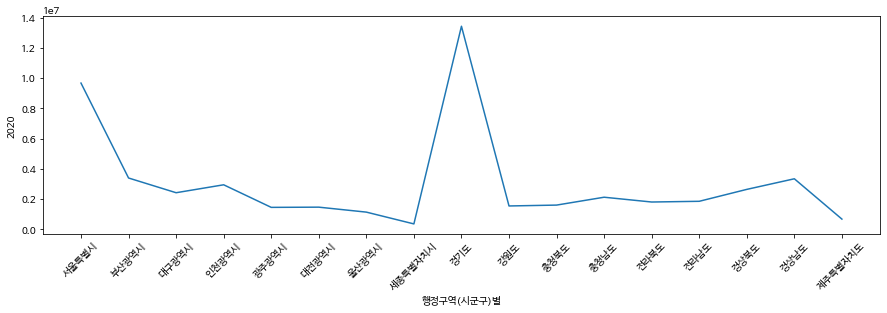

In [46]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.lineplot(data=df, x='행정구역(시군구)별', y='2020')

In [ ]:
dir(sns)

### population_kosis_1997-2019.csv

In [48]:
df_kosis = pd.read_csv('pdsample/population_kosis_1997_2019.csv', encoding='cp949')
df_kosis

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,...,2019. 09.2,2019. 10,2019. 10.1,2019. 10.2,2019. 11,2019. 11.1,2019. 11.2,2019. 12,2019. 12.1,2019. 12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,11602,25613,12989,12624,23727,12097,11630,21228,11023,10205
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,2066,4513,2337,2176,4170,2128,2042,3670,1953,1717
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,642,1430,717,713,1321,683,638,1240,671,569
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,514,1150,600,550,1100,585,515,942,488,454
5,인천광역시,3646,1878,1768,3193,1646,1547,3466,1789,1677,...,674,1560,799,761,1417,758,659,1299,662,637
6,광주광역시,2166,1106,1060,1910,985,925,2013,1030,983,...,331,733,375,358,668,325,343,568,291,277
7,대전광역시,2003,1055,948,1869,927,942,1894,947,947,...,322,683,337,346,634,314,320,599,312,287
8,울산광역시,1754,935,819,1569,838,731,1771,946,825,...,277,661,334,327,591,302,289,532,249,283
9,세종특별자치시,-,-,-,-,-,-,-,-,-,...,140,322,168,154,310,153,157,274,160,114


In [49]:
df_kosis.shape

(19, 829)

In [50]:
# 모든 칼럼들이 보이도록 설정한다.
pd.options.display.max_columns=829

In [51]:
df_kosis.head(3)

,시군구별,1997. 01,1997. 01.1,1997. 01.2,1997. 02,1997. 02.1,1997. 02.2,1997. 03,1997. 03.1,1997. 03.2,1997. 04,1997. 04.1,1997. 04.2,1997. 05,1997. 05.1,1997. 05.2,1997. 06,1997. 06.1,1997. 06.2,1997. 07,1997. 07.1,1997. 07.2,1997. 08,1997. 08.1,1997. 08.2,1997. 09,1997. 09.1,1997. 09.2,1997. 10,1997. 10.1,1997. 10.2,1997. 11,1997. 11.1,1997. 11.2,1997. 12,1997. 12.1,1997. 12.2,1998. 01,1998. 01.1,1998. 01.2,1998. 02,1998. 02.1,1998. 02.2,1998. 03,1998. 03.1,1998. 03.2,1998. 04,1998. 04.1,1998. 04.2,1998. 05,1998. 05.1,1998. 05.2,1998. 06,1998. 06.1,1998. 06.2,1998. 07,1998. 07.1,1998. 07.2,1998. 08,1998. 08.1,1998. 08.2,1998. 09,1998. 09.1,1998. 09.2,1998. 10,1998. 10.1,1998. 10.2,1998. 11,1998. 11.1,1998. 11.2,1998. 12,1998. 12.1,1998. 12.2,1999. 01,1999. 01.1,1999. 01.2,1999. 02,1999. 02.1,1999. 02.2,1999. 03,1999. 03.1,1999. 03.2,1999. 04,1999. 04.1,1999. 04.2,1999. 05,1999. 05.1,1999. 05.2,1999. 06,1999. 06.1,1999. 06.2,1999. 07,1999. 07.1,1999. 07.2,1999. 08,1999. 08.1,1999. 08.2,1999. 09,1999. 09.1,1999. 09.2,1999. 10,1999. 10.1,1999. 10.2,1999. 11,1999. 11.1,1999. 11.2,1999. 12,1999. 12.1,1999. 12.2,2000. 01,2000. 01.1,2000. 01.2,2000. 02,2000. 02.1,2000. 02.2,2000. 03,2000. 03.1,2000. 03.2,2000. 04,2000. 04.1,2000. 04.2,2000. 05,2000. 05.1,2000. 05.2,2000. 06,2000. 06.1,2000. 06.2,2000. 07,2000. 07.1,2000. 07.2,2000. 08,2000. 08.1,2000. 08.2,2000. 09,2000. 09.1,2000. 09.2,2000. 10,2000. 10.1,2000. 10.2,2000. 11,2000. 11.1,2000. 11.2,2000. 12,2000. 12.1,2000. 12.2,2001. 01,2001. 01.1,2001. 01.2,2001. 02,2001. 02.1,2001. 02.2,2001. 03,2001. 03.1,2001. 03.2,2001. 04,2001. 04.1,2001. 04.2,2001. 05,2001. 05.1,2001. 05.2,2001. 06,2001. 06.1,2001. 06.2,2001. 07,2001. 07.1,2001. 07.2,2001. 08,2001. 08.1,2001. 08.2,2001. 09,2001. 09.1,2001. 09.2,2001. 10,2001. 10.1,2001. 10.2,2001. 11,2001. 11.1,2001. 11.2,2001. 12,2001. 12.1,2001. 12.2,2002. 01,2002. 01.1,2002. 01.2,2002. 02,2002. 02.1,2002. 02.2,2002. 03,2002. 03.1,2002. 03.2,2002. 04,2002. 04.1,2002. 04.2,2002. 05,2002. 05.1,2002. 05.2,2002. 06,2002. 06.1,2002. 06.2,2002. 07,2002. 07.1,2002. 07.2,2002. 08,2002. 08.1,2002. 08.2,2002. 09,2002. 09.1,2002. 09.2,2002. 10,2002. 10.1,2002. 10.2,2002. 11,2002. 11.1,2002. 11.2,2002. 12,2002. 12.1,2002. 12.2,2003. 01,2003. 01.1,2003. 01.2,2003. 02,2003. 02.1,2003. 02.2,2003. 03,2003. 03.1,2003. 03.2,2003. 04,2003. 04.1,2003. 04.2,2003. 05,2003. 05.1,2003. 05.2,2003. 06,2003. 06.1,2003. 06.2,2003. 07,2003. 07.1,2003. 07.2,2003. 08,2003. 08.1,2003. 08.2,2003. 09,2003. 09.1,2003. 09.2,2003. 10,2003. 10.1,2003. 10.2,2003. 11,2003. 11.1,2003. 11.2,2003. 12,2003. 12.1,2003. 12.2,2004. 01,2004. 01.1,2004. 01.2,2004. 02,2004. 02.1,2004. 02.2,2004. 03,2004. 03.1,2004. 03.2,2004. 04,2004. 04.1,2004. 04.2,2004. 05,2004. 05.1,2004. 05.2,2004. 06,2004. 06.1,2004. 06.2,2004. 07,2004. 07.1,2004. 07.2,2004. 08,2004. 08.1,2004. 08.2,2004. 09,2004. 09.1,2004. 09.2,2004. 10,2004. 10.1,2004. 10.2,2004. 11,2004. 11.1,2004. 11.2,2004. 12,2004. 12.1,2004. 12.2,2005. 01,2005. 01.1,2005. 01.2,2005. 02,2005. 02.1,2005. 02.2,2005. 03,2005. 03.1,2005. 03.2,2005. 04,2005. 04.1,2005. 04.2,2005. 05,2005. 05.1,2005. 05.2,2005. 06,2005. 06.1,2005. 06.2,2005. 07,2005. 07.1,2005. 07.2,2005. 08,2005. 08.1,2005. 08.2,2005. 09,2005. 09.1,2005. 09.2,2005. 10,2005. 10.1,2005. 10.2,2005. 11,2005. 11.1,2005. 11.2,2005. 12,2005. 12.1,2005. 12.2,2006. 01,2006. 01.1,2006. 01.2,2006. 02,2006. 02.1,2006. 02.2,2006. 03,2006. 03.1,2006. 03.2,2006. 04,2006. 04.1,2006. 04.2,2006. 05,2006. 05.1,2006. 05.2,2006. 06,2006. 06.1,2006. 06.2,2006. 07,2006. 07.1,2006. 07.2,2006. 08,2006. 08.1,2006. 08.2,2006. 09,2006. 09.1,2006. 09.2,2006. 10,2006. 10.1,2006. 10.2,2006. 11,2006. 11.1,2006. 11.2,2006. 12,2006. 12.1,2006. 12.2,2007. 01,2007. 01.1,2007. 01.2,2007. 02,2007. 02.1,2007. 02.2,2007. 03,2007. 03.1,2007. 03.2,2007. 04,2007. 04.1,2007. 04.2,2007. 05,2007. 05.1,2007. 05.2,2007. 06,2007. 06.1,2007. 06.2,2007. 07,2007. 07.1,2007. 07.2,2007. 08,2007. 08.1,2007. 08.2,2007. 09,2007. 09.1,2007. 

In [66]:
df = df_kosis.melt(id_vars='시군구별')
df

,시군구별,variable,value
0,시군구별,1997. 01,계 (명)
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
...,...,...,...
15727,전라북도,2019. 12.2,290
15728,전라남도,2019. 12.2,353
15729,경상북도,2019. 12.2,455
15730,경상남도,2019. 12.2,646


In [67]:
df.shape

(15732, 3)

In [68]:
df['시군구별'].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [69]:
df[df['시군구별']=='시군구별']

,시군구별,variable,value
0,시군구별,1997. 01,계 (명)
19,시군구별,1997. 01.1,남자 (명)
38,시군구별,1997. 01.2,여자 (명)
57,시군구별,1997. 02,계 (명)
76,시군구별,1997. 02.1,남자 (명)
...,...,...,...
15637,시군구별,2019. 11.1,남자 (명)
15656,시군구별,2019. 11.2,여자 (명)
15675,시군구별,2019. 12,계 (명)
15694,시군구별,2019. 12.1,남자 (명)


In [58]:
df[df['시군구별']=='시군구별'].copy()
df

,시군구별,variable,value
0,시군구별,1997. 01,계 (명)
1,시군구별,1997. 01,63268
2,시군구별,1997. 01,13205
3,시군구별,1997. 01,4201
4,시군구별,1997. 01,3345
...,...,...,...
15727,시군구별,2019. 12.2,290
15728,시군구별,2019. 12.2,353
15729,시군구별,2019. 12.2,455
15730,시군구별,2019. 12.2,646


In [70]:
df = df[df['시군구별']!='시군구별'].copy()
df

,시군구별,variable,value
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646
...,...,...,...
15727,전라북도,2019. 12.2,290
15728,전라남도,2019. 12.2,353
15729,경상북도,2019. 12.2,455
15730,경상남도,2019. 12.2,646


In [71]:
df['시군구별'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [72]:
df.head()

,시군구별,variable,value
1,전국,1997. 01,63268
2,서울특별시,1997. 01,13205
3,부산광역시,1997. 01,4201
4,대구광역시,1997. 01,3345
5,인천광역시,1997. 01,3646


In [73]:
df.tail()

,시군구별,variable,value
15727,전라북도,2019. 12.2,290
15728,전라남도,2019. 12.2,353
15729,경상북도,2019. 12.2,455
15730,경상남도,2019. 12.2,646
15731,제주특별자치도,2019. 12.2,182


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      14904 non-null  object
 1   variable  14904 non-null  object
 2   value     14904 non-null  object
dtypes: object(3)
memory usage: 465.8+ KB


In [89]:
#Serise 으로 리턴
print(type(df['variable']))
#print(df['variable'])
dir(df['variable'].str) #StringMethods
print(df['variable'].str.split('.')[1][0])
print(df['variable'].str.split('.')[1][1])
print(type(df['variable'].str.split('.')))
print(df['variable'].str.split('.'))
print('-----------------------------------')
# DataFrame으로 리턴
print(type(df['variable'].str.split('.', expand=True)))
print(df['variable'].str.split('.', expand=True))

<class 'pandas.core.series.Series'>
1997
 01
<class 'pandas.core.series.Series'>
1           [1997,  01]
2           [1997,  01]
3           [1997,  01]
4           [1997,  01]
5           [1997,  01]
              ...      
15727    [2019,  12, 2]
15728    [2019,  12, 2]
15729    [2019,  12, 2]
15730    [2019,  12, 2]
15731    [2019,  12, 2]
Name: variable, Length: 14904, dtype: object
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
          0    1     2
1      1997   01  None
2      1997   01  None
3      1997   01  None
4      1997   01  None
5      1997   01  None
...     ...  ...   ...
15727  2019   12     2
15728  2019   12     2
15729  2019   12     2
15730  2019   12     2
15731  2019   12     2

[14904 rows x 3 columns]


In [90]:
df['연도']= df['variable'].str.split('.', expand=True)[0]
df['월']= df['variable'].str.split('.', expand=True)[1]
df['성별']= df['variable'].str.split('.', expand=True)[2]

In [91]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,None
2,서울특별시,1997. 01,13205,1997,01,None
3,부산광역시,1997. 01,4201,1997,01,None
4,대구광역시,1997. 01,3345,1997,01,None
5,인천광역시,1997. 01,3646,1997,01,None


In [93]:
df.tail()

,시군구별,variable,value,연도,월,성별
15727,전라북도,2019. 12.2,290,2019,12,2
15728,전라남도,2019. 12.2,353,2019,12,2
15729,경상북도,2019. 12.2,455,2019,12,2
15730,경상남도,2019. 12.2,646,2019,12,2
15731,제주특별자치도,2019. 12.2,182,2019,12,2


In [94]:
# 모든 데이터 타입이 object이다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14904 entries, 1 to 15731
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시군구별      14904 non-null  object
 1   variable  14904 non-null  object
 2   value     14904 non-null  object
 3   연도        14904 non-null  object
 4   월         14904 non-null  object
 5   성별        9936 non-null   object
dtypes: object(6)
memory usage: 1.3+ MB


In [95]:
# 성별에 none이 포함되어 있다.
df['성별'].unique()

array([None, '1', '2'], dtype=object)

In [96]:
# None아닌 unique 갯수만 반환한다.
df['성별'].nunique()

2

In [97]:
#'성별'에서 'None'을 '전체'로 바꾸어 준다.
df['성별'] = df['성별'].fillna('전체')

In [98]:
df.head()

,시군구별,variable,value,연도,월,성별
1,전국,1997. 01,63268,1997,01,전체
2,서울특별시,1997. 01,13205,1997,01,전체
3,부산광역시,1997. 01,4201,1997,01,전체
4,대구광역시,1997. 01,3345,1997,01,전체
5,인천광역시,1997. 01,3646,1997,01,전체


In [99]:
df.tail()

,시군구별,variable,value,연도,월,성별
15727,전라북도,2019. 12.2,290,2019,12,2
15728,전라남도,2019. 12.2,353,2019,12,2
15729,경상북도,2019. 12.2,455,2019,12,2
15730,경상남도,2019. 12.2,646,2019,12,2
15731,제주특별자치도,2019. 12.2,182,2019,12,2


In [100]:
df['성별'].unique()

array(['전체', '1', '2'], dtype=object)

In [101]:
df['성별']= df['성별'].replace('1','남').replace('2','여')
df['성별'].unique()

array(['전체', '남', '여'], dtype=object)

In [102]:
df.tail()

,시군구별,variable,value,연도,월,성별
15727,전라북도,2019. 12.2,290,2019,12,여
15728,전라남도,2019. 12.2,353,2019,12,여
15729,경상북도,2019. 12.2,455,2019,12,여
15730,경상남도,2019. 12.2,646,2019,12,여
15731,제주특별자치도,2019. 12.2,182,2019,12,여


In [104]:
# Series에만 사용할 수 있다.
# 빈도수를 계산한다.
df['성별'].value_counts()

전체    4968
남     4968
여     4968
Name: 성별, dtype: int64